# R-Practice/Processing Time Phrase Data

In [5]:
phrases <- read.csv('time_phrases.csv')

In [6]:
# count number of rows, i.e. phrases

nrow(phrases)

[1] 4077

In [7]:
# count number of cols., i.e. data points

ncol(phrases)

[1] 15

In [8]:
str(phrases)

'data.frame':	4077 obs. of  15 variables:
 $ book            : Factor w/ 39 levels "1_Chronicles",..: 15 15 15 15 15 15 15 15 15 15 ...
 $ chapter         : int  1 2 2 2 2 2 3 3 3 3 ...
 $ verse           : int  1 2 2 5 5 17 8 14 17 22 ...
 $ clause.n        : int  427553 427680 427682 427693 427694 427738 427805 427835 427851 427866 ...
 $ time.n          : int  651503 651884 651890 651918 651923 652050 652259 652341 652388 652436 ...
 $ domain          : Factor w/ 4 levels "?","D","N","Q": 1 3 3 2 2 4 3 4 4 4 ...
 $ num.time.phrases: int  1 1 1 1 1 1 1 1 1 1 ...
 $ verb.tense      : Factor w/ 9 levels "impf","impv",..: 5 7 7 1 1 1 9 1 1 9 ...
 $ num.preps       : int  1 1 1 0 0 1 1 0 0 0 ...
 $ preps           : Factor w/ 57 levels "<D","<D|<D","<D|L",..: 12 12 12 57 57 12 35 57 57 57 ...
 $ num.subs        : int  1 1 1 0 0 1 1 1 1 0 ...
 $ subs            : Factor w/ 222 levels "<CTJ/","<D/",..: 179 118 118 222 222 118 184 133 133 222 ...
 $ num.quants      : int  0 0 0 0 0 0 0 0 0 

In [9]:
colnames(phrases)

[1] "book"             "chapter"          "verse"            "clause.n"        
 [5] "time.n"           "domain"           "num.time.phrases" "verb.tense"      
 [9] "num.preps"        "preps"            "num.subs"         "subs"            
[13] "num.quants"       "quants"           "pdp.tags"

In [10]:
head(phrases)

book,chapter,verse,clause.n,time.n,domain,num.time.phrases,verb.tense,num.preps,preps,num.subs,subs,num.quants,quants,pdp.tags
Genesis,1,1,427553,651503,?,1,perf,1,B,1,R>CJT/,0,ø,prep-subs
Genesis,2,2,427680,651884,N,1,wayq,1,B,1,JWM/,0,ø,prep-art-subs-art-adjv
Genesis,2,2,427682,651890,N,1,wayq,1,B,1,JWM/,0,ø,prep-art-subs-art-adjv
Genesis,2,5,427693,651918,D,1,impf,0,ø,0,ø,0,ø,advb
Genesis,2,5,427694,651923,D,1,impf,0,ø,0,ø,0,ø,advb
Genesis,2,17,427738,652050,Q,1,impf,1,B,1,JWM/,0,ø,prep-subs


In [11]:
tail(phrases)

,book,chapter,verse,clause.n,time.n,domain,num.time.phrases,verb.tense,num.preps,preps,num.subs,subs,num.quants,quants,pdp.tags
4072,2_Chronicles,36,5,515581,904472,N,1,perf,0,ø,1,>XD/,2,>XD/|<FRH/,subs-subs-subs
4073,2_Chronicles,36,9,515596,904516,N,1,perf,0,ø,2,CLC/|<FRH=/,2,CLC/|<FRH=/,subs-subs-conj-subs-subs
4074,2_Chronicles,36,10,515599,904525,N,1,perf,1,L,1,TCWBH/,0,ø,prep-subs-art-subs
4075,2_Chronicles,36,11,515604,904540,N,1,perf,0,ø,1,>XD/,2,>XD/|<FRH/,subs-subs-subs
4076,2_Chronicles,36,21,515639,904649,N,1,perf,0,ø,1,KL/,0,ø,subs-subs-art-subs
4077,2_Chronicles,36,22,515641,904654,N,1,perf,2,B|L,1,CNH/,1,>XD/,prep-subs-subs-prep-nmpr-subs-nmpr


In [12]:
table(phrases$verb.tense)


impf impv infa infc perf ptca wayq weqt    ø 
1024   93    8  133  953   24  771  243  828 

In [13]:
domains <- table(phrases$domain)

domains


   ?    D    N    Q 
 280  121 1302 2374 

### Prepositions

In [14]:
num.preps <- table(phrases$num.preps) # number of preps per phrase

num.preps


   0    1    2    3    4    5    7 
1540 2201  279   38   11    7    1 

In [15]:
mean(phrases$num.preps) # average number of preps per phrase

[1] 0.7257788

In [16]:
# N.B., the number above is the avg. num. of preps per phrase
# but that is not the same as the average num. of phrases w/ preps.


has.prep <- sum(1880, 238, 32, 10, 6)
not.prep <- 1089
tot.prep <- sum(has.prep, not.prep)

has.prep/tot.prep

[1] 0.6654378

In [17]:
# but below is much more programmatic and informative

has.prep <- table(phrases$num.preps > 0)
perc.prep <- has.prep / sum(has.prep)

perc.prep <- round(perc.prep*100, 1)

print('percent of phrases with prep: ')

perc.prep

[1] "percent of phrases with prep: "



FALSE  TRUE 
 37.8  62.2 

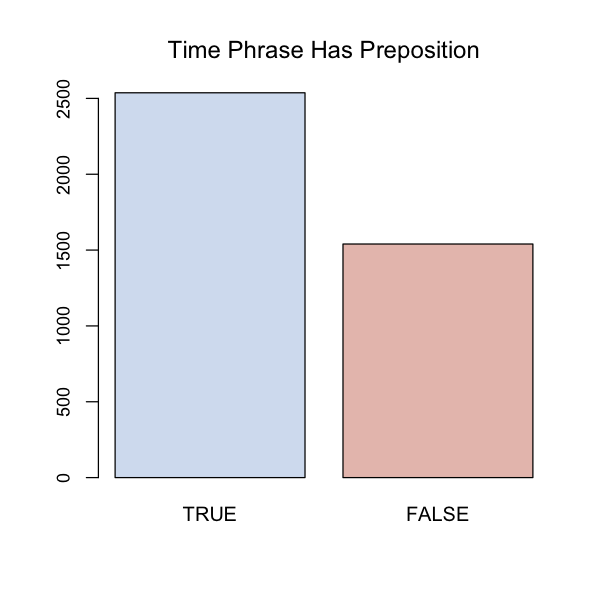

In [18]:
options(repr.plot.width=5, repr.plot.height=5) # plot dimensions in ipynb
colors = c('#D5E1F1', '#E8C2BA')

barplot(
        has.prep[c(2, 1)],
        main='Time Phrase Has Preposition',
        ylim = c(0, 2500),
        col = colors,
        cex.axis = .9,
        
     )


### Substantives

In [19]:
table(phrases$num.subs) # numbers of subs. per phrase


   0    1    2    3    4 
 859 3011  190   15    2 

In [20]:
mean(phrases$num.subs) # average number of substantives per phrase

[1] 0.8447388

In [21]:
with.subs = table(phrases$num.subs > 0) # phrases with substantives

with.subs


FALSE  TRUE 
  859  3218 

In [22]:
perc.subs = round(with.subs / sum(with.subs) * 100, 1)

perc.subs


FALSE  TRUE 
 21.1  78.9 

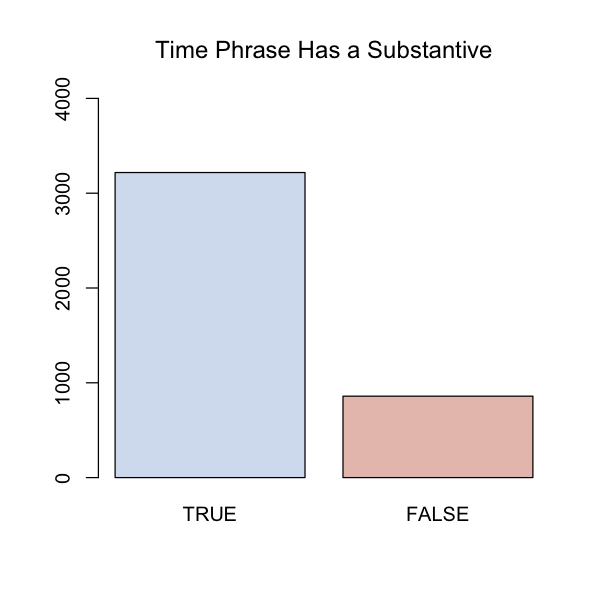

In [23]:
options(repr.plot.width=5, repr.plot.width=5)
barplot(
        with.subs[c(2, 1)],
        main='Time Phrase Has a Substantive',
        col=colors,
        ylim=c(0, 4000),
       )

### method to measure margin of error

via Martijn

In [24]:
binom.test(700, 1200, 0.5)


	Exact binomial test

data:  700 and 1200
number of successes = 700, number of trials = 1200, p-value = 8.535e-09
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.5548467 0.6114106
sample estimates:
probability of success 
             0.5833333 


In [25]:
c(seq(1,10, by=2))

[1] 1 3 5 7 9

## How are Time Phrases Distributed throughout the HB?

Goal: make a strip chart to illustrate the spread of time phrases throughout the traditional corpus.

In [26]:
head(phrases)

book,chapter,verse,clause.n,time.n,domain,num.time.phrases,verb.tense,num.preps,preps,num.subs,subs,num.quants,quants,pdp.tags
Genesis,1,1,427553,651503,?,1,perf,1,B,1,R>CJT/,0,ø,prep-subs
Genesis,2,2,427680,651884,N,1,wayq,1,B,1,JWM/,0,ø,prep-art-subs-art-adjv
Genesis,2,2,427682,651890,N,1,wayq,1,B,1,JWM/,0,ø,prep-art-subs-art-adjv
Genesis,2,5,427693,651918,D,1,impf,0,ø,0,ø,0,ø,advb
Genesis,2,5,427694,651923,D,1,impf,0,ø,0,ø,0,ø,advb
Genesis,2,17,427738,652050,Q,1,impf,1,B,1,JWM/,0,ø,prep-subs


In [104]:
# make subsequent clause enumerations for the strip chart

first.clnode <- 427553 - 1

phrases$clause.num <- phrases$clause.n-first.clnode

head(phrases, 2)

book,chapter,verse,clause.n,time.n,domain,num.time.phrases,verb.tense,num.preps,preps,num.subs,subs,num.quants,quants,pdp.tags,clause.num
Genesis,1,1,427553,651503,?,1,perf,1,B,1,R>CJT/,0,ø,prep-subs,1
Genesis,2,2,427680,651884,N,1,wayq,1,B,1,JWM/,0,ø,prep-art-subs-art-adjv,128


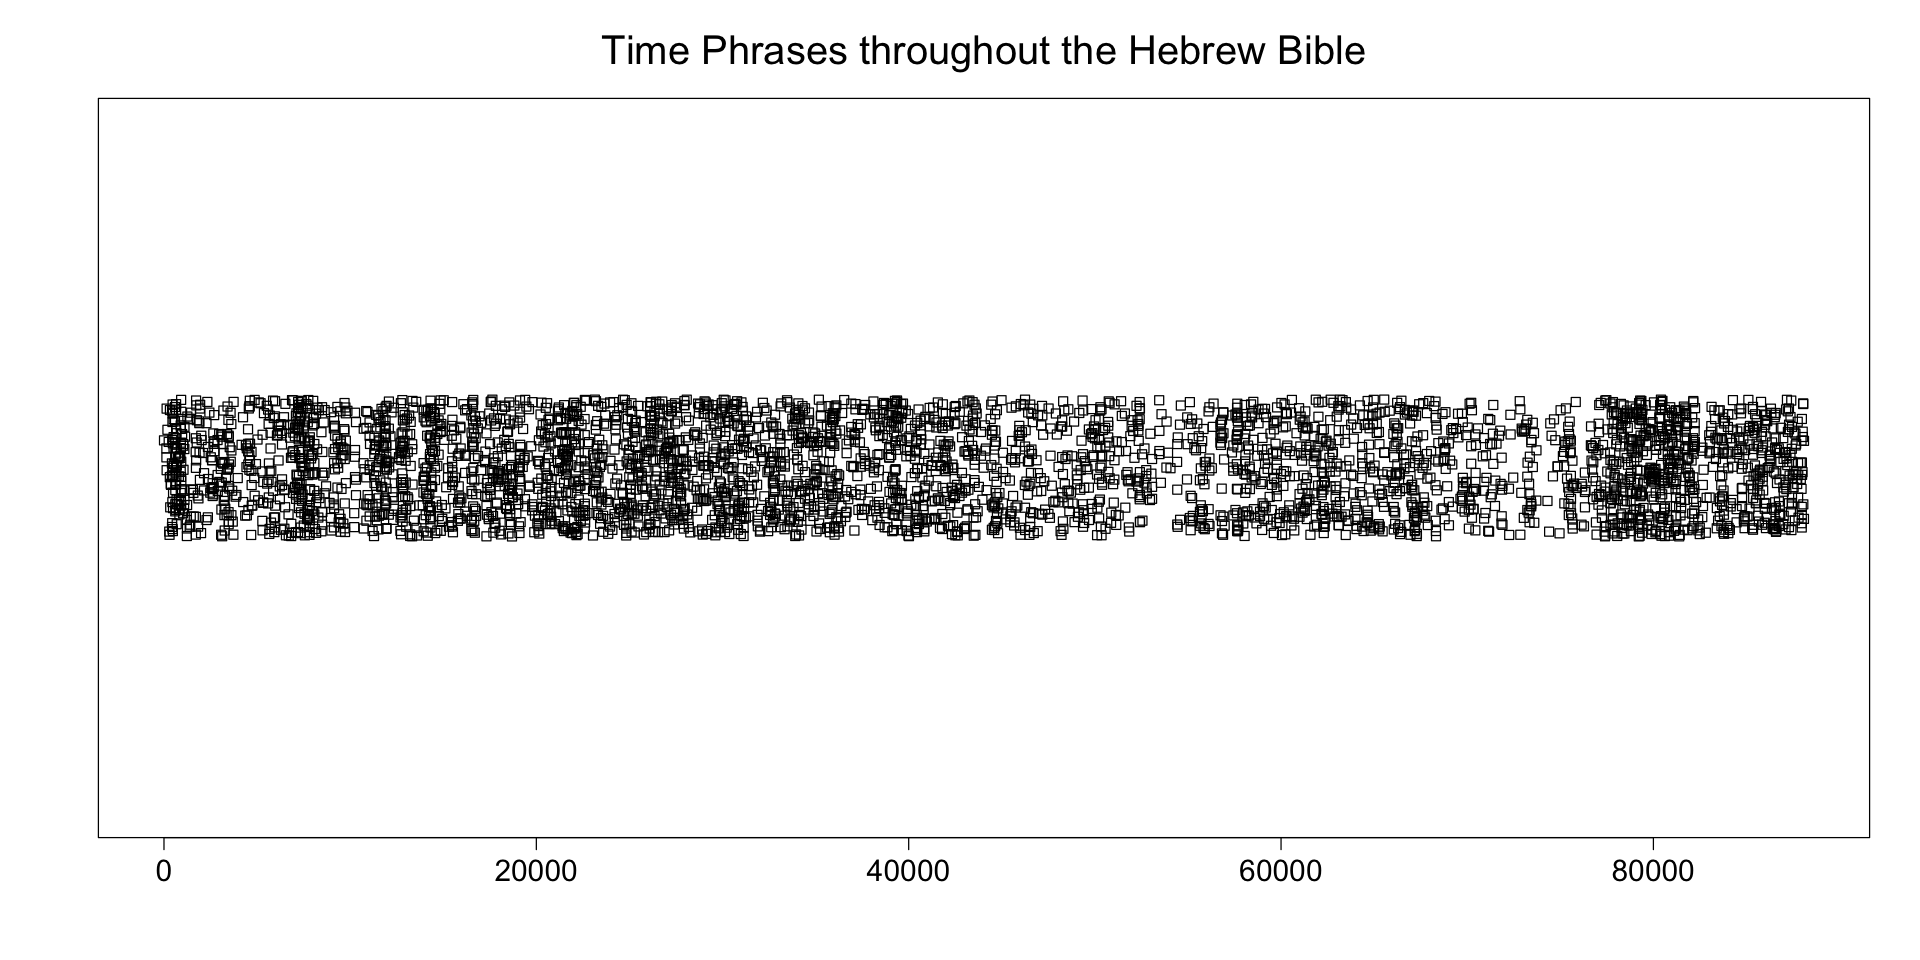

In [28]:
options(repr.plot.height=8, repr.plot.width=16)

stripchart(phrases$clause.num, 
           main = 'Time Phrases throughout the Hebrew Bible',
           method = 'jitter',
           cex.axis = 1.5,
           cex.main = 2
          )

This is more or less spread out through the whole corpus, but with some small gaps between clauses 60000 and 80000.

## Tense and Time Phrases

In [29]:
phrase.tenses <- table(phrases$verb.tense)

phrase.tenses


impf impv infa infc perf ptca wayq weqt    ø 
1024   93    8  133  953   24  771  243  828 

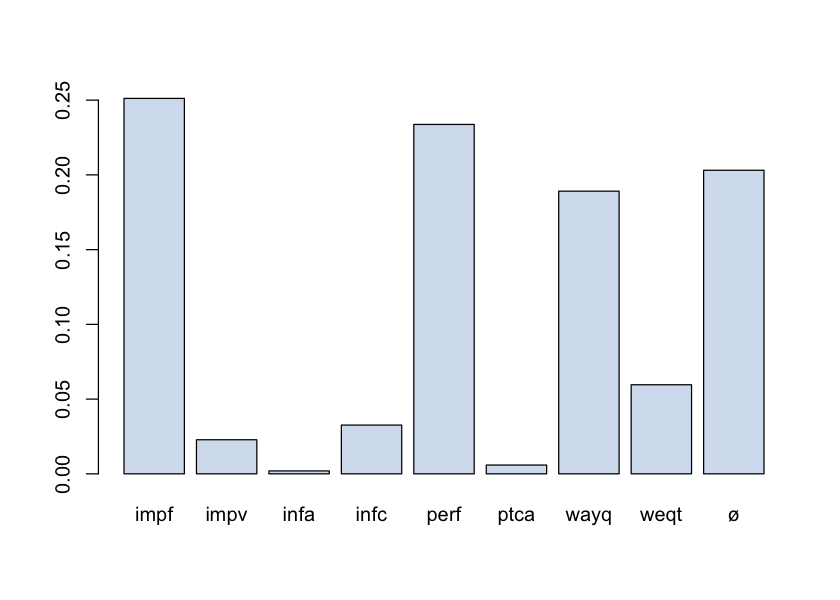

In [30]:
options(repr.plot.height=5, repr.plot.width=7) # set plots back to default

phrase.tense.perc <- phrase.tenses/sum(phrase.tenses)

barplot(phrase.tense.perc,
        col=colors[1]
       )

In [31]:
wlm.phrases <- phrases[phrases$subs == '<WLM/',]
wlm.tenses <- table(wlm.phrases$verb.tense)

wlm.tense.perc <- wlm.tenses/sum(wlm.tenses)

wlm.tense.perc


      impf       impv       infa       infc       perf       ptca       wayq 
0.45212766 0.03191489 0.00000000 0.08510638 0.11702128 0.00000000 0.03191489 
      weqt          ø 
0.11170213 0.17021277 

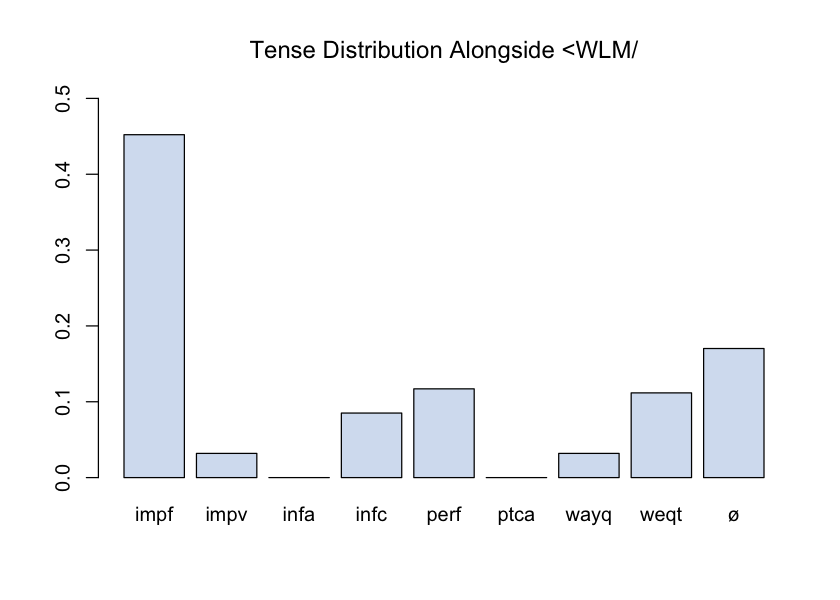

In [32]:
barplot(wlm.tense.perc,
        main = 'Tense Distribution Alongside <WLM/',
        ylim = c(0, .5),
        col = colors[1]
       )

## Comparison of Tense and Preposition

In [49]:
tense.prep <- table(phrases$prep, phrases$verb.tense)

In [53]:
as.data.frame.matrix(tense.prep)

,impf,impv,infa,infc,perf,ptca,wayq,weqt,ø
<D,102,7,0,11,61,0,63,38,48
<D|<D,1,0,0,0,0,0,0,0,0
<D|L,0,0,0,0,2,0,4,1,1
<D|MN,1,0,0,0,0,0,0,0,0
<L,3,0,0,0,1,0,0,0,1
<M,0,0,0,0,1,0,0,0,0
>L,0,0,0,0,0,0,1,0,0
>T,1,0,0,0,0,0,0,0,0
>T|>T,0,0,0,0,0,0,1,0,0
>XR/,34,0,0,0,43,0,48,0,10


In [50]:
# change table to matrix
# https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Getting-and-setting-attributes
# is this best method?

attributes(tense.prep)$class <- 'matrix'

In [35]:
head(tense.prep)

,impf,impv,infa,infc,perf,ptca,wayq,weqt,ø
<D,102,7,0,11,61,0,63,38,48
<D|<D,1,0,0,0,0,0,0,0,0
<D|L,0,0,0,0,2,0,4,1,1
<D|MN,1,0,0,0,0,0,0,0,0
<L,3,0,0,0,1,0,0,0,1
<M,0,0,0,0,1,0,0,0,0


In [36]:
tense.prep <- tense.prep[order(rowSums(tense.prep), decreasing = T),]

t(tense.prep)

,ø,B,<D,L,MN,>XR/,B|L,B|B,K,MN|<D,⋯,L|<D,L|>XR/,L|L|L,L|L|L|B|B|B|B,L|MN|B,MN|B|MN|B,MN|L|<D,MN|L|MN|L,MN|MN,MN|MN|L|L|MN
impf,353,298,102,140,18,34,4,23,12,11,⋯,0,0,0,0,0,1,0,0,0,0
impv,33,24,7,15,1,0,0,0,8,2,⋯,0,0,0,0,0,0,0,0,0,1
infa,3,2,0,1,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0
infc,54,40,11,14,0,0,2,3,4,1,⋯,0,0,1,0,0,0,0,0,0,0
perf,345,268,61,40,55,43,64,13,13,6,⋯,0,1,0,0,0,0,1,1,0,0
ptca,20,1,0,0,3,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
wayq,208,278,63,23,56,48,41,9,9,7,⋯,1,0,0,0,0,0,0,0,0,0
weqt,67,109,38,18,2,0,0,4,0,1,⋯,0,0,0,0,0,0,0,0,0,0
ø,457,157,48,60,37,10,12,6,7,9,⋯,0,0,0,1,1,0,0,0,1,0


## Convert to Ratios

In [100]:
# obtain ratios with apply function (thanks Martijn)

tense.prep.perc <- apply(tense.prep, 1, function (row) {round(row / sum(row), 2)})

t(tense.prep.perc)

,impf,impv,infa,infc,perf,ptca,wayq,weqt,ø
<D,0.31,0.02,0.00,0.03,0.18,0.00,0.19,0.12,0.15
<D|<D,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
<D|L,0.00,0.00,0.00,0.00,0.25,0.00,0.50,0.12,0.12
<D|MN,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
<L,0.60,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.20
<M,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
>L,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
>T,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
>T|>T,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
>XR/,0.25,0.00,0.00,0.00,0.32,0.00,0.36,0.00,0.07


In [101]:
 sum(tense.prep.perc[,1])

[1] 1